# Importing Libraries

In [211]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Reading the Data

In [212]:
df = pd.read_csv(r"C:\Users\Ketan\Downloads\CarPrice_Assignment.csv")
#df = pd.read_csv(r"C:\Users\Ketan\Downloads\train.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Feature selection 


Size= Carwidth + Carheight + Carweight
mpg = citympg + highwaympg

In [213]:
sum = df["carwidth"] * df["carheight"]  *df["curbweight"]
mpg = df["citympg"] +df["highwaympg"]
df["Size"]=np.power(sum,1/3)
df["mpg"]=mpg/2
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Size,mpg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,199.752593,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,199.752593,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,213.187214,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,203.285083,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,216.742561,20.0


CHoosing only valuable values in the Data 

In [214]:
df = df [["fueltype","doornumber","carbody","Size","enginetype","cylindernumber","enginesize","horsepower","peakrpm","mpg","price"]]
df.head()

,fueltype,doornumber,carbody,Size,enginetype,cylindernumber,enginesize,horsepower,peakrpm,mpg,price
0,gas,two,convertible,199.752593,dohc,four,130,111,5000,24.0,13495.0
1,gas,two,convertible,199.752593,dohc,four,130,111,5000,24.0,16500.0
2,gas,two,hatchback,213.187214,ohcv,six,152,154,5000,22.5,16500.0
3,gas,four,sedan,203.285083,ohc,four,109,102,5500,27.0,13950.0
4,gas,four,sedan,216.742561,ohc,five,136,115,5500,20.0,17450.0


Changing STRING to INT

In [215]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['four','six','five','three','twelve','two','eight'])
df["cylindernumber"] = le_sex.transform(df["cylindernumber"]) 

Etype = preprocessing.LabelEncoder()
Etype.fit(['dohc','ohcv','ohc','l','rotor','ohcf','dohcv'])
df["enginetype"] = Etype.transform(df["enginetype"])

Cbody = preprocessing.LabelEncoder()
Cbody.fit(['convertible','hatchback','sedan','wagon','hardtop'])
df["carbody"] = Cbody.transform(df["carbody"]) 
#df["cylindernumber"] = df["cylindernumber"].astype({"four": int, "five": int})

In [164]:
df.head(20)

,fueltype,doornumber,carbody,Size,enginetype,cylindernumber,enginesize,horsepower,peakrpm,mpg,price
0,gas,two,0,199.752593,0,2,130,111,5000,24.0,13495.000
1,gas,two,0,199.752593,0,2,130,111,5000,24.0,16500.000
2,gas,two,2,213.187214,5,3,152,154,5000,22.5,16500.000
3,gas,four,3,203.285083,3,2,109,102,5500,27.0,13950.000
4,gas,four,3,216.742561,3,1,136,115,5500,20.0,17450.000
5,gas,two,3,206.658907,3,1,136,110,5500,22.0,15250.000
6,gas,four,3,224.471392,3,1,136,110,5500,22.0,17710.000
7,gas,four,4,227.328891,3,1,136,110,5500,22.0,18920.000
8,gas,four,3,230.941499,3,1,131,140,5500,18.5,23875.000
9,gas,two,2,220.902166,3,1,131,160,5500,19.0,17859.167


Changing binary String to Binary int

In [216]:
from sklearn.preprocessing import LabelBinarizer
df["doornumber"] = LabelBinarizer().fit_transform(df.doornumber)
df["fueltype"] = LabelBinarizer().fit_transform(df.fueltype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    int32  
 1   doornumber      205 non-null    int32  
 2   carbody         205 non-null    int32  
 3   Size            205 non-null    float64
 4   enginetype      205 non-null    int32  
 5   cylindernumber  205 non-null    int32  
 6   enginesize      205 non-null    int64  
 7   horsepower      205 non-null    int64  
 8   peakrpm         205 non-null    int64  
 9   mpg             205 non-null    float64
 10  price           205 non-null    float64
dtypes: float64(3), int32(5), int64(3)
memory usage: 13.7 KB


In [217]:
df.head()

,fueltype,doornumber,carbody,Size,enginetype,cylindernumber,enginesize,horsepower,peakrpm,mpg,price
0,1,1,0,199.752593,0,2,130,111,5000,24.0,13495.0
1,1,1,0,199.752593,0,2,130,111,5000,24.0,16500.0
2,1,1,2,213.187214,5,3,152,154,5000,22.5,16500.0
3,1,0,3,203.285083,3,2,109,102,5500,27.0,13950.0
4,1,0,3,216.742561,3,1,136,115,5500,20.0,17450.0


# DATA VISULIZATION

Scattering

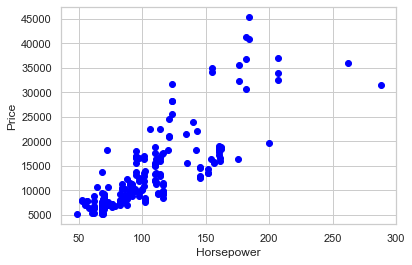

In [218]:
plt.scatter(df.horsepower, df.price,color='Blue')
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

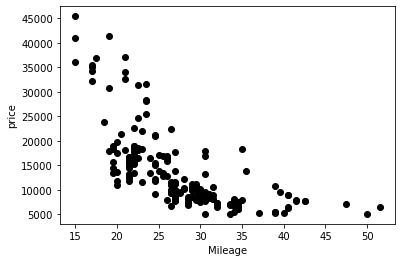

In [168]:
plt.scatter(df.mpg,df.price,color='black')
plt.xlabel("Mileage")
plt.ylabel("price")
plt.show

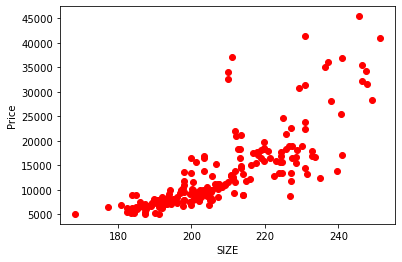

In [176]:
plt.scatter(df.Size,df.price,color='red')
plt.xlabel("SIZE")
plt.ylabel("Price")
plt.show()

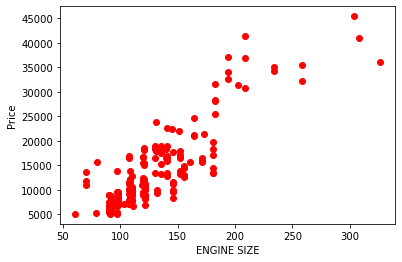

In [185]:
plt.scatter(df.enginesize,df.price,color='red')
plt.xlabel("ENGINE SIZE")
plt.ylabel("Price")
plt.show()

# SEABORN

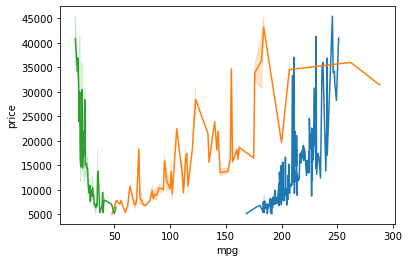

In [181]:
# import module
import seaborn as sns
# ploting lineplot
sns.lineplot( df['Size'], df['price'])
sns.lineplot(df['horsepower'],df['price'])
sns.lineplot(df['mpg'],df['price'])


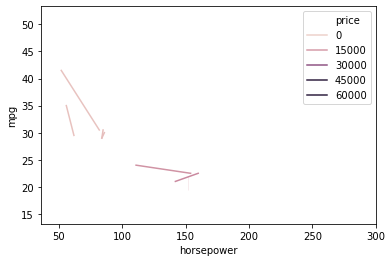

In [183]:
sns.lineplot(df['horsepower'],df['mpg'], hue =df["price"])

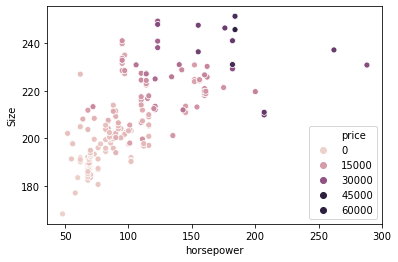

In [190]:
sns.scatterplot( df['horsepower'], df['Size'],hue =df["price"])

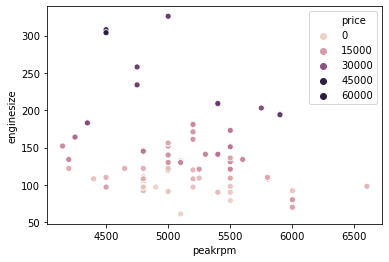

In [194]:
#df['mpg'],df['cylindernumber'],df['peakrpm'],df['doornumber'],df['enginesize'] 
sns.scatterplot(df['peakrpm'],df['enginesize'],hue = df['price'])

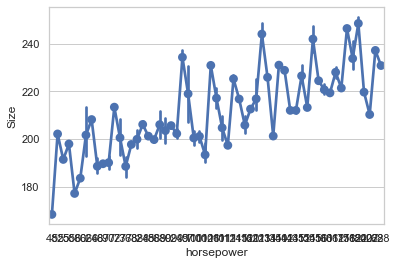

In [197]:
sns.set(style = 'whitegrid')
 

sns.pointplot(x = df["horsepower"], y = df["Size"], df = df)

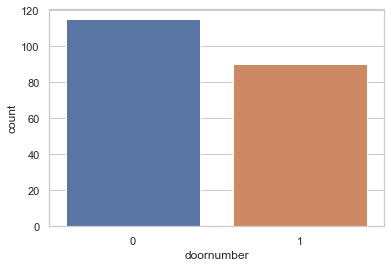

In [198]:
sns.set(style = 'whitegrid')
sns.countplot(df["doornumber"])

# Splitting the DATA

In [228]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=25)

(164, 11)

# NORMALIZATION

Now we'll Normalize our data
therefore first we will create matrix of independent and dependent variable.


In [200]:
#X = train[['fueltype', 'doornumber','carbody', 'Size', 'enginetype', 'cylindernumber', 'enginesize', 'horsepower','peakrpm', 'mpg']].values #.astype(float)
X[:5]

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.99752593e+02,
        0.00000000e+00, 2.00000000e+00, 1.30000000e+02, 1.11000000e+02,
        5.00000000e+03, 2.40000000e+01],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.99752593e+02,
        0.00000000e+00, 2.00000000e+00, 1.30000000e+02, 1.11000000e+02,
        5.00000000e+03, 2.40000000e+01],
       [1.00000000e+00, 0.00000000e+00, 3.00000000e+00, 2.16742561e+02,
        3.00000000e+00, 1.00000000e+00, 1.36000000e+02, 1.15000000e+02,
        5.50000000e+03, 2.00000000e+01],
       [1.00000000e+00, 1.00000000e+00, 3.00000000e+00, 2.06658907e+02,
        3.00000000e+00, 1.00000000e+00, 1.36000000e+02, 1.10000000e+02,
        5.50000000e+03, 2.20000000e+01],
       [1.00000000e+00, 0.00000000e+00, 3.00000000e+00, 2.24471392e+02,
        3.00000000e+00, 1.00000000e+00, 1.36000000e+02, 1.10000000e+02,
        5.50000000e+03, 2.20000000e+01]])

In [201]:
#y = train[["price"]]
y[:5]

,price
0,13495.0
1,16500.0
4,17450.0
5,15250.0
6,17710.0


In [202]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[:5]

array([[ 0.34846603,  1.15900111, -2.98579919, -0.45233108, -3.04157991,
        -0.0542992 ,  0.10341314,  0.24773661, -0.17119909, -0.64776896],
       [ 0.34846603,  1.15900111, -2.98579919, -0.45233108, -3.04157991,
        -0.0542992 ,  0.10341314,  0.24773661, -0.17119909, -0.64776896],
       [ 0.34846603, -0.86281194,  0.45261504,  0.5385005 ,  0.0525543 ,
        -1.47512822,  0.26053439,  0.35510624,  0.91698944, -1.25583908],
       [ 0.34846603,  1.15900111,  0.45261504, -0.04956434,  0.0525543 ,
        -1.47512822,  0.26053439,  0.22089421,  0.91698944, -0.95180402],
       [ 0.34846603, -0.86281194,  0.45261504,  0.98923531,  0.0525543 ,
        -1.47512822,  0.26053439,  0.22089421,  0.91698944, -0.95180402]])

In [205]:
df.head()

,fueltype,doornumber,carbody,Size,enginetype,cylindernumber,enginesize,horsepower,peakrpm,mpg,price
0,1,1,0,199.752593,0,2,130,111,5000,24.0,13495.0
1,1,1,0,199.752593,0,2,130,111,5000,24.0,16500.0
2,1,1,2,213.187214,5,3,152,154,5000,22.5,16500.0
3,1,0,3,203.285083,3,2,109,102,5500,27.0,13950.0
4,1,0,3,216.742561,3,1,136,115,5500,20.0,17450.0


# Multiple Linear Regression Model

In [232]:
from sklearn import linear_model
x = train[['fueltype', 'doornumber','carbody', 'Size', 'enginetype', 'cylindernumber', 'enginesize', 'horsepower','peakrpm', 'mpg']]
y = train[['price']]
regr = linear_model.LinearRegression()
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-1945.99314539 -1198.70181648 -1131.27127256   164.21787972
    524.41314461   556.66339774   111.9445665     42.05135852
      2.53138533   128.65788482]]


In [231]:
x.shape

(164, 10)

In [239]:
y_hat= regr.predict(test[['fueltype', 'doornumber','carbody', 'Size', 'enginetype', 'cylindernumber', 'enginesize', 'horsepower','peakrpm', 'mpg']])
x = np.asanyarray(test[['fueltype', 'doornumber','carbody', 'Size', 'enginetype', 'cylindernumber', 'enginesize', 'horsepower','peakrpm', 'mpg']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 16688852.07
Variance score: 0.71
